<a href="https://colab.research.google.com/github/luckguy/SS2022/blob/main/SS06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 離散時間LTI 系統在時間上的關係式



### 線性常係數差分方程式

輸入訊號 $x[n]$ 與輸出訊號 $y[n] 之關係可使用線性常係數差分方程式描述。 $a_n, b_m \in \mathbb{C}$ reads

\begin{equation}
\sum_{k = 0}^{N} a_k \; y[n - k] = \sum_{m = 0}^{M} b_m \; x[n -m]
\end{equation}

with $a_N \neq 0$. The order of the difference equation is given by $N$. For a unique solution of the difference equation, $N$ initial conditions are required. Under the assumption that the input signal of the system $x[k] = 0$ for $k < 0$ these are given by $y[0], y[-1], \dots, y[-N + 1]$. Other cases can be handled accordingly.

### Linear Time-Invariant Systems

LTI systems are an important class of systems. In order to show that linear difference equations with constant coefficients represent LTI systems, the linearity and time-invariance property has to be checked. A system is linear when the superposition principle holds

\begin{equation}
\mathcal{H} \{ A x_1[k] + B x_2[k] \} = A \cdot \mathcal{H} \{ x_1[k] \} + B \cdot \mathcal{H} \{ x_2[k] \}
\end{equation}

for arbitraty signals $x_1[k], x_2[k] \in \mathbb{C}$ and coefficients $A, B \in \mathbb{C}$. Above condition is fulfilled by a linear difference equation, since the [summation](https://en.wikipedia.org/wiki/Summation) on left- and right-hand side is a linear operation. A system is time-invariant when

\begin{equation}
y[k - \kappa] = \mathcal{H} \{ x[k - \kappa] \}
\end{equation}

with $y[k] = \mathcal{H} \{ x[k] \}$ holds for $\kappa \in \mathbb{Z}$. Substituting $k$ by $k -\kappa$ in above linear difference equation shows that the time-invariance is fulfilled.

### Computation of the Output Signal

The solution of above difference equation is derived by extracting $y[k]$ from the sum on the left-hand-side and rearranging terms. This results in

\begin{equation}
y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right)
\end{equation}

for $a_0 \neq 0$. The output signal is given by a weighted superposition of the actual and past samples of the input signal $x[k]$ and past samples of the output signal $y[k]$. The second sum is known as *recursive* part since it can be interpreted as a feedback of past output samples. The dependency on the input samples (the first sum) is known as *non-recursive* part.

It can be concluded that linear difference equations with constant coefficients represent LTI systems. The coefficients together with the initial conditions characterize an LTI system fully. However, not all LTI systems can be described by linear difference equations of finite order $N$. Idealized systems may result in a linear difference equation of infinite order, for instance.

### Recursive and Non-Recursive Systems

Above analysis of the solution of a linear difference equation revealed two contributions to the output signal $y[k]$: a non-recursive part which depends only on the current and past input samples $x[k]$ and a recursive part which depends on past output samples $y[k]$. A system is said to be

* non-recursive if its output depends only on the input signal $x[k]$. This implies that $a_n = 0$ for $n > 0$.
* recursive if its output depends on the input signal $x[k]$ and past output samples $y[k]$. This implies that at least one $a_n \neq 0$ for $n > 0$.

The classification into non-recursive and recursive systems has far reaching implications on the theory and practical realization of recursive systems. The feedback of past output samples in recursive systems for instance, may lead to instabilities and numerical issues. The former are discussed in detail later.

#### 延遲系統

The output signal $y[n] = \mathcal{H} \{ x[n] \}$ of a discrete system which delays the input $x[n]$ by $N_0$ \in \mathbb{N}$ samples is given as

\begin{equation}
y[n] = x[n - N_0]
\end{equation}

The order of the system is $N=0$. The coefficients of the linear difference equation read

\begin{align}
a_0 &= 1 \\
b_m &= \begin{cases}
1 & \text{for } m=N_0 \\
0 & \text{otherwise}
\end{cases}
\end{align}

The system is non-recursive as can be deduced from its coefficients.

The output signal $y[k]$ for a cosine signal at the input $x[k] = \cos[\Omega k]$ is computed by solving the difference equation for zero initial conditions and $\kappa = 5$. The Python module [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html) offers various functionality for continuous and discrete systems. The function [`scipy.signal.filter`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter) implements above formula for the computation of the output signal $y[k]$ of a discrete LTI system given its coefficients and initial conditions. The coefficients $a_n$ and $b_m$ of the system are stored in the vectors `a` and `b`.

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

# 延遲系統 y[n]=x[n-4]
a = 1.0               # a 為 y[n] 係數
b = [0.0, 0.0, 0.0, 0.0, 1.0] # b 為 x[n] 係數

n = np.arange(30)
x = np.cos(2*np.pi/15 * n)
y = signal.lfilter(b, a, x)

將輸入訊號 $x[n]$ 與輸出 $y[n]$ 劃出.

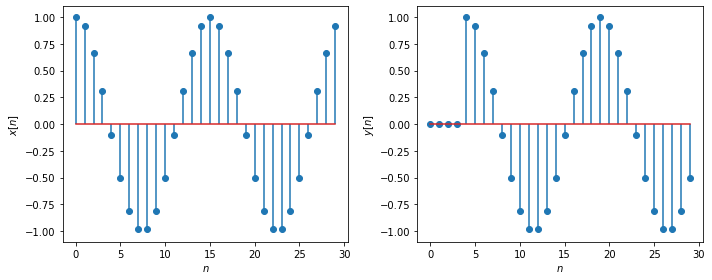

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(n, x, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel(r'$x[n]$')
plt.ylim([-1.1, 1.1])

plt.subplot(122)
plt.stem(n, y, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.ylim([-1.1, 1.1])
plt.tight_layout()

#### 移動平均器

The [moving average](https://en.wikipedia.org/wiki/Moving_average) of a time-series is frequently used to smooth out short-term fluctuations in order to emphasize longer-term trends. A system which calculates the moving average of its input signal $x[k]$ is represented by

\begin{equation}
y[n] = \frac{1}{M} \sum_{k = 0}^{M-1} x[n - k]
\end{equation}

The order of the system is $N=0$. The coefficients of the linear difference equation read

\begin{align}
a_0 &= 1 \\
b_m &= \begin{cases}
\frac{1}{M} & \text{for } 0 \leq m < M \\
0 & \text{otherwise}
\end{cases}
\end{align}

The system is non-recursive as can be deduced from its coefficients. The output of the system for a cosine signal at the input superimposed with noise is computed as illustration of the functionality of the moving average.

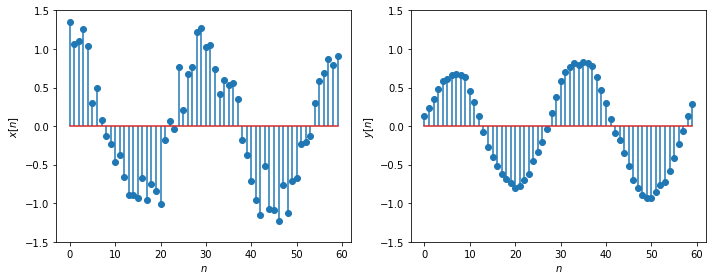

In [10]:
np.random.seed(seed=0)

M = 10
a = [1.0]
b = 1/M * np.ones(M)

n = np.arange(0, 60)
x = np.cos(2*np.pi/30 * n) + .2 * np.random.normal(size=(len(n)))
y = signal.lfilter(b, a, x)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(n, x,use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel(r'$x[n]$')
plt.ylim([-1.5, 1.5])

plt.subplot(122)
plt.stem(n, y,use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.ylim([-1.5, 1.5])
plt.tight_layout()

#### 二階系統 

The recursive LTI system with the 底下二階線性差分方程式

\begin{equation}
y[n] - y[n-1] + \frac{1}{2} y[n-2] = x[n]
\end{equation}

The order of the system is $N=2$. The coefficients of the system can be derived from its difference equation as $a_0 = 1$, $a_1 = -1$, $a_2 = \frac{1}{2}$ and $b_0 = 1$. The output signal for a rectangular signal at the input $x[n] = \text{rect}_{20}[n]$ is computed and plotted for zero initial conditions.

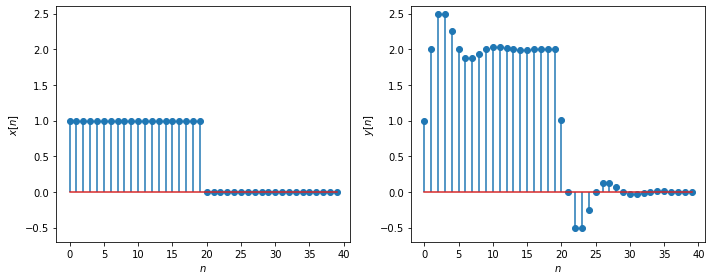

In [11]:
def rect(k, N):
    return np.where((k >= 0) & (k < N), 1.0, 0.0)


# LTI 系統
a = [1.0, -1.0, 1/2]
b = [1.0]

n = np.arange(0, 40)
x = rect(n, 20)
y = signal.lfilter(b, a, x)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(n, x,use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel(r'$x[n]$')
plt.ylim([-0.7, 2.6])

plt.subplot(122)
plt.stem(n, y, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$y[n]$')
plt.ylim([-0.7, 2.6])
plt.tight_layout()